In [1]:
import cv2
import numpy as np
import os
import radialProfile
import glob
from matplotlib import pyplot as plt
import pickle
from scipy.interpolate import griddata
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix

### 1. Using DFT + Azimuthal Average Create features

In [2]:


data= {}
epsilon = 1e-8
N = 300
y = []
error = []

number_fake = 918
number_real = 203

psd1D_total = np.zeros([number_fake, N])
label_total = np.zeros([number_fake])
psd1D_org_mean = np.zeros(N)
psd1D_org_std = np.zeros(N)


cont = 0

#fake data
rootdir = 'data/fake/'
print(rootdir)

for subdir, dirs, files in os.walk(rootdir):
    for file in files:        

        filename = os.path.join(subdir, file)
        
        img = cv2.imread(filename,0)
        
        # we crop the center
        h = int(img.shape[0]/3)
        w = int(img.shape[1]/3)
        img = img[h:-h,w:-w]

        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)

        magnitude_spectrum = 20*np.log(np.abs(fshift))
        psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)

        # Calculate the azimuthally averaged 1D power spectrum
        points = np.linspace(0,N,num=psd1D.size) # coordinates of a
        xi = np.linspace(0,N,num=N) # coordinates for interpolation

        interpolated = griddata(points,psd1D,xi,method='cubic')
        interpolated /= interpolated[0]

        psd1D_total[cont,:] = interpolated             
        label_total[cont] = 0
        cont+=1

        if cont == number_fake:
            break
    if cont == number_fake:
        break
            
for x in range(N):
    psd1D_org_mean[x] = np.mean(psd1D_total[:,x])
    psd1D_org_std[x]= np.std(psd1D_total[:,x])


## real data
psd1D_total2 = np.zeros([number_real, N])
label_total2 = np.zeros([number_real])
psd1D_org_mean2 = np.zeros(N)
psd1D_org_std2 = np.zeros(N)


cont = 0
rootdir2 = 'data/real/'

for subdir, dirs, files in os.walk(rootdir2):
    for file in files:        

        filename = os.path.join(subdir, file)
        
        print("processing file", filename)
        
        parts = filename.split("/")
   
        img = cv2.imread(filename,0)


        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        fshift += epsilon


        magnitude_spectrum = 20*np.log(np.abs(fshift))

        # Calculate the azimuthally averaged 1D power spectrum
        psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)

        points = np.linspace(0,N,num=psd1D.size) # coordinates of a
        xi = np.linspace(0,N,num=N) # coordinates for interpolation

        interpolated = griddata(points,psd1D,xi,method='cubic')
        interpolated /= interpolated[0]

        psd1D_total2[cont,:] = interpolated             
        label_total2[cont] = 1
        cont+=1

        if cont == number_real:
            break
    if cont == number_real:
        break

for x in range(N):
    psd1D_org_mean2[x] = np.mean(psd1D_total2[:,x])
    psd1D_org_std2[x]= np.std(psd1D_total2[:,x])
    
    
y.append(psd1D_org_mean)
y.append(psd1D_org_mean2)

error.append(psd1D_org_std)
error.append(psd1D_org_std2)

psd1D_total_final = np.concatenate((psd1D_total,psd1D_total2), axis=0)
label_total_final = np.concatenate((label_total,label_total2), axis=0)

data["data"] = psd1D_total_final
data["label"] = label_total_final

output = open('train_3200.pkl', 'wb')
pickle.dump(data, output)
output.close()

print("DATA Saved") 

data/fake/
processing file data/real/bwhlgysghg.mp4-f150.jpg
processing file data/real/avmjormvsx.mp4-f150.jpg
processing file data/real/ecujsjhscd.mp4-f200.jpg
processing file data/real/dhxctgyoqj.mp4-f100.jpg
processing file data/real/afoovlsmtx.mp4-f80.jpg
processing file data/real/ajqslcypsw.mp4-f150.jpg
processing file data/real/ckjaibzfxa.mp4-f200.jpg
processing file data/real/eqnoqyfquo.mp4-f80.jpg
processing file data/real/duycddgtrl.mp4-f100.jpg
processing file data/real/dbtbbhakdv.mp4-f100.jpg
processing file data/real/eqnoqyfquo.mp4-f150.jpg
processing file data/real/cprhtltsjp.mp4-f200.jpg
processing file data/real/afoovlsmtx.mp4-f150.jpg
processing file data/real/caifxvsozs.mp4-f100.jpg
processing file data/real/atkdltyyen.mp4-f100.jpg
processing file data/real/eckvhdusax.mp4-f80.jpg
processing file data/real/bwipwzzxxu.mp4-f200.jpg
processing file data/real/bmjzrlszhi.mp4-f80.jpg
processing file data/real/ckjaibzfxa.mp4-f80.jpg
processing file data/real/drcyabprvt.mp4-f20

processing file data/real/atvmxvwyns.mp4-f200.jpg
processing file data/real/ehtdtkmmli.mp4-f150.jpg
processing file data/real/bwhlgysghg.mp4-f200.jpg
processing file data/real/ecujsjhscd.mp4-f150.jpg
processing file data/real/aytzyidmgs.mp4-f200.jpg
processing file data/real/clrycekyst.mp4-f100.jpg
processing file data/real/cppdvdejkc.mp4-f150.jpg
processing file data/real/dlpoieqvfb.mp4-f150.jpg
processing file data/real/efwfxwwlbw.mp4-f80.jpg
processing file data/real/cizlkenljw.mp4-f80.jpg
processing file data/real/brwrlczjvi.mp4-f100.jpg
processing file data/real/bilnggbxgu.mp4-f80.jpg
processing file data/real/dbtbbhakdv.mp4-f80.jpg
processing file data/real/ajqslcypsw.mp4-f100.jpg
processing file data/real/drcyabprvt.mp4-f150.jpg
processing file data/real/bmjzrlszhi.mp4-f150.jpg
processing file data/real/aybumesmpk.mp4-f80.jpg
processing file data/real/brwrlczjvi.mp4-f200.jpg
processing file data/real/beboztfcme.mp4-f200.jpg
processing file data/real/dakiztgtnw.mp4-f80.jpg
proces

In [3]:
len(psd1D_total)

918

### 2. Re-loading Features

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# load feature file
pkl_file = open('train_3200.pkl', 'rb')
data = pickle.load(pkl_file)
pkl_file.close()
X = data["data"]
y = data["label"]

In [6]:
len(y)

1121

### 3. Check class imbalance

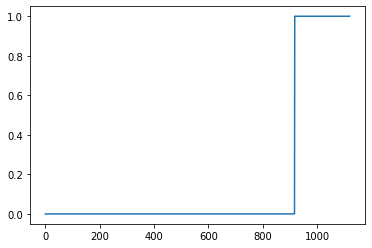

In [28]:
plt.plot(y);

In [7]:
counter_0 = 0
counter_1 = 1
for value in y:
    if value==0:
        counter_0 +=1
    else:
        counter_1 +=1

counter_0, counter_1

(918, 204)

### Plot power spectrum vs Spatial frequency, check if the classes look different 

Text(0, 0.5, 'Power Spectrum')

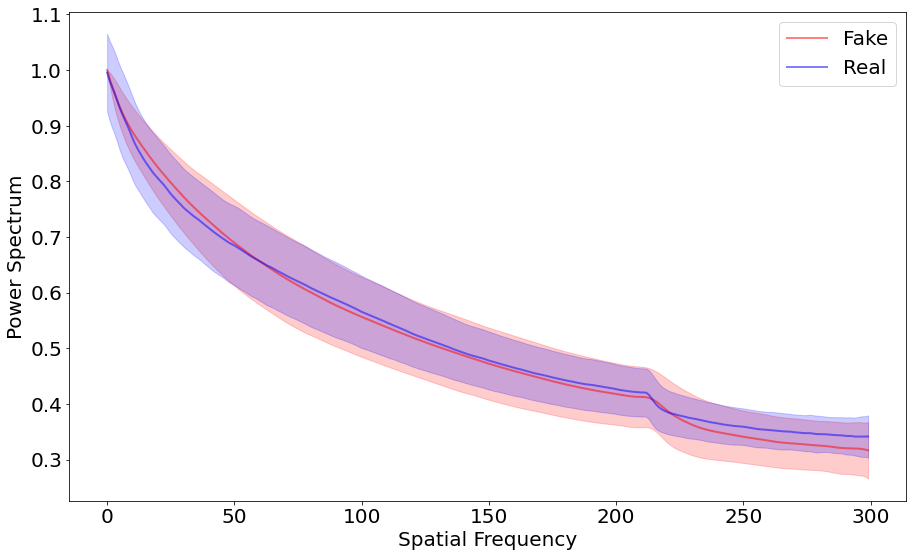

In [8]:

num_feat = X.shape[1]

psd1D_org_0 = np.zeros((counter_0,num_feat))
psd1D_org_1 = np.zeros((counter_1,num_feat))
psd1D_org_0_mean = np.zeros(num_feat)
psd1D_org_0_std = np.zeros(num_feat)
psd1D_org_1_mean = np.zeros(num_feat)
psd1D_org_1_std = np.zeros(num_feat)

cont_0=0
cont_1=0

# We separate real and fake using the label
for x in range(X.shape[0]):
#for x in range(num):
    if y[x]==0:
        psd1D_org_0[cont_0,:] = X[x,:]
        cont_0+=1
    elif y[x]==1:
        psd1D_org_1[cont_1,:] = X[x,:]
        cont_1+=1


for x in range(num_feat):
    psd1D_org_0_mean[x] = np.mean(psd1D_org_0[:,x])
    psd1D_org_0_std[x]= np.std(psd1D_org_0[:,x])
    psd1D_org_1_mean[x] = np.mean(psd1D_org_1[:,x])
    psd1D_org_1_std[x]= np.std(psd1D_org_1[:,x])
    
# Plot
x = np.arange(0, num_feat, 1)
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(x, psd1D_org_0_mean, alpha=0.5, color='red', label='Fake', linewidth =2.0)
ax.fill_between(x, psd1D_org_0_mean - psd1D_org_0_std, psd1D_org_0_mean + psd1D_org_0_std, color='red', alpha=0.2)
ax.plot(x, psd1D_org_1_mean, alpha=0.5, color='blue', label='Real', linewidth =2.0)
ax.fill_between(x, psd1D_org_1_mean - psd1D_org_1_std, psd1D_org_1_mean + psd1D_org_1_std, color='blue', alpha=0.2)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
ax.legend(loc='best', prop={'size': 20})
plt.xlabel("Spatial Frequency", fontsize=20)
plt.ylabel("Power Spectrum", fontsize=20)

### 4. Split Dataset

In [16]:
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pickle

#its called train but its actually the entire dataset
pkl_file = open('train_3200.pkl', 'rb')
data = pickle.load(pkl_file)
pkl_file.close()
X = data["data"]
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((896, 300), (225, 300), (896,), (225,))

### 5. Classification + Results

In [17]:
svclassifier_r = SVC(C=6.37, kernel='rbf', gamma=0.86)
svclassifier_r.fit(X_train, y_train)

logreg = LogisticRegression(solver='liblinear', max_iter=1000)
logreg.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

#### SVM Results

In [18]:
# SVM
print(classification_report(y_test, svclassifier_r.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       189
         1.0       0.86      0.86      0.86        36

    accuracy                           0.96       225
   macro avg       0.92      0.92      0.92       225
weighted avg       0.96      0.96      0.96       225



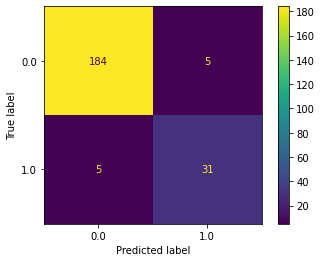

In [19]:
plot_confusion_matrix(svclassifier_r, X_test, y_test );

#### LR results

In [20]:
# LR
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90       189
         1.0       0.00      0.00      0.00        36

    accuracy                           0.82       225
   macro avg       0.42      0.49      0.45       225
weighted avg       0.70      0.82      0.76       225



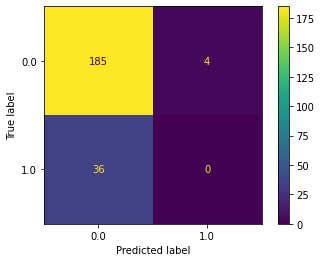

In [21]:
plot_confusion_matrix(logreg, X_test, y_test );

#### RF results

In [22]:
# Random Forest
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       189
         1.0       0.86      0.69      0.77        36

    accuracy                           0.93       225
   macro avg       0.90      0.84      0.87       225
weighted avg       0.93      0.93      0.93       225



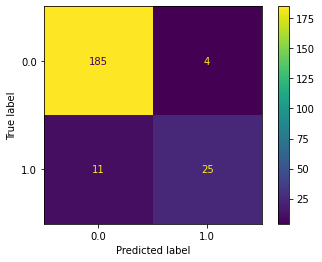

In [23]:
plot_confusion_matrix(rf, X_test, y_test );